In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
titan=sns.load_dataset("titanic")
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
titan.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Data understanding

In [5]:
titan.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

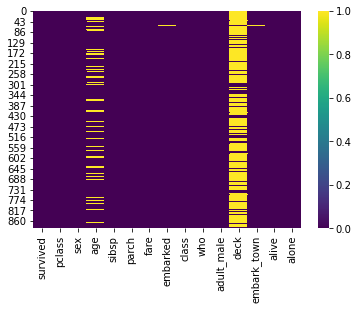

In [6]:
sns.heatmap(titan.isnull(),cmap='viridis')

In [83]:
#How many % data is missing
titan['age'].isnull().sum()/titan.shape[0]*100

19.865319865319865

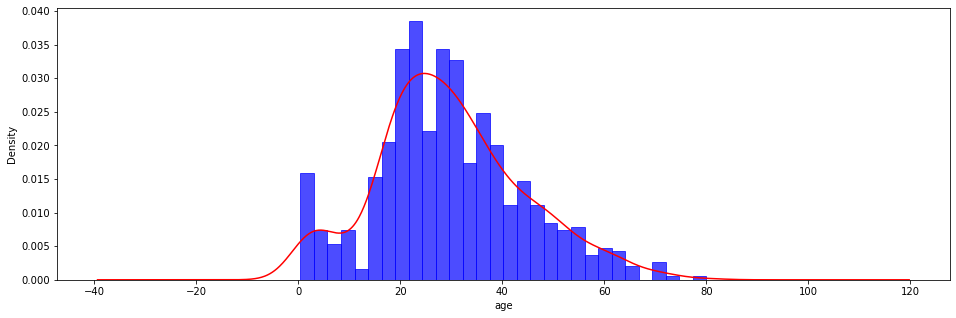

In [84]:
#Distribution of Age
ax=titan['age'].hist(bins=30,density=True, stacked=True, 
                     Color='blue', alpha=0.7,figsize=(16,5))
titan['age'].plot(kind='density',color='red')
ax.set_xlabel('age')
plt.show()

Change categorical value to numerical values
Also age distribution to be corrected to have new feature set

C:\Users\jeysu_000\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\jeysu_000\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\jeysu_000\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


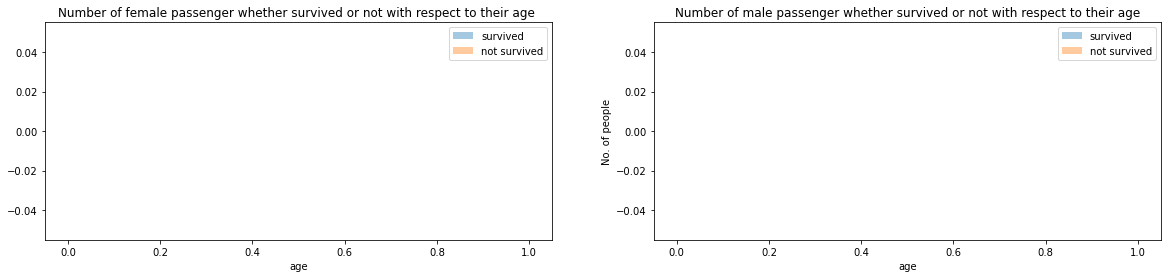

In [150]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))
women = titan[titan['sex'] == 'female']
men = titan[titan['sex'] == 'male']

ax = sns.distplot(women[women[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Number of female passenger whether survived or not with respect to their age ')
ax = sns.distplot(men[men[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Number of male passenger whether survived or not with respect to their age')
plt.ylabel('No. of people')
plt.show()

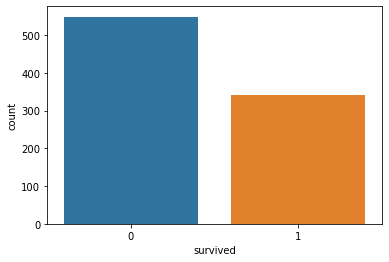

In [14]:
sns.countplot(x='survived',data=titan)

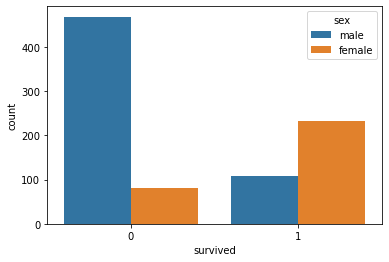

In [15]:
sns.countplot(x='survived',hue='sex',data=titan)

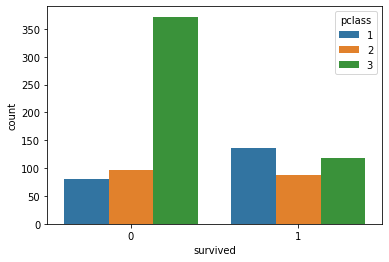

In [16]:
sns.countplot(x='survived',hue='pclass',data=titan)

In [17]:
titan.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

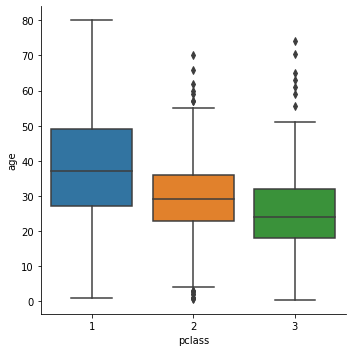

In [86]:
sns.catplot(x='pclass',y='age',data=titan, kind='box')

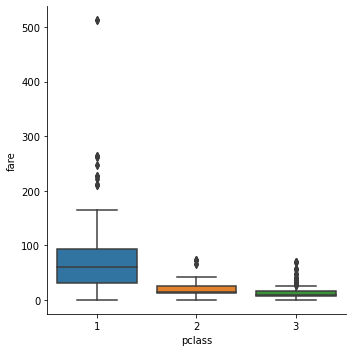

In [87]:
sns.catplot(x='pclass',y='fare',data=titan, kind='box')

In [30]:
titan[titan['pclass']==1]['age'].mean(),'/n',titan[titan['pclass']==4]['age'].mean()

(38.0, '/n', nan)

#Data Wrangling
Imputing null values with function

In [21]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titan[titan['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titan[titan['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titan[titan['pclass'] == 3]['age'].mean()
        
    else:
        return age

In [22]:
titan['age'] = titan[['age', 'pclass']].apply(impute_age, axis=1)

In [153]:
common_value='35'
titan.age.fillna(common_value, inplace = True)

In [23]:
titan.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
df=titan.pclass,titan.pclass>=2
print(df)

(0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64, 0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: pclass, Length: 891, dtype: bool)


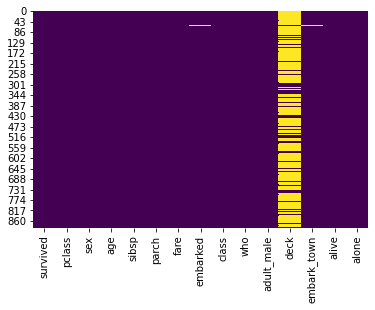

In [25]:
sns.heatmap(titan.isnull(),cbar=False,cmap='viridis')

#Analyzing Embarked

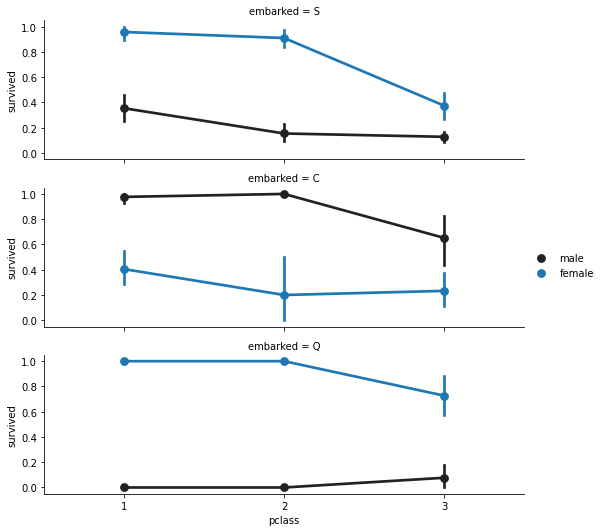

In [26]:
f=sns.FacetGrid(titan, row='embarked', height=2.5, aspect= 3)
f.map(sns.pointplot, 'pclass','survived', 'sex', order= None, hue_order =None)
f.add_legend()

In [27]:
titan['embarked'].isnull().sum()

2

In [28]:
titan['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [29]:
common_value='S'
titan['embarked'].fillna(common_value, inplace = True)

In [30]:
titan['embarked'].isnull().sum()

0

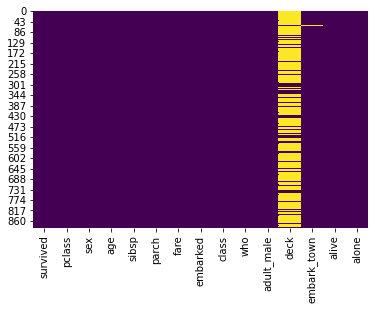

In [31]:
sns.heatmap(titan.isnull(),cbar=False,cmap='viridis')

#Drop deck and embarked down

In [32]:
titan.drop(labels=['deck','embark_town','alive'], inplace= True, axis =1)

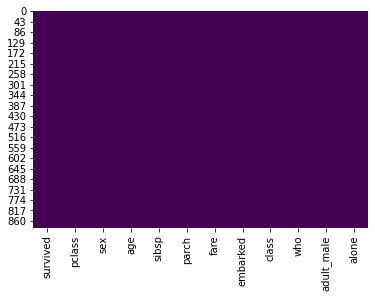

In [33]:
sns.heatmap(titan.isnull(),cbar=False,cmap='viridis')

#Lets do feature transformation

In [34]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [35]:
titan.age=titan.age.astype('int')
titan.fare=titan.fare.astype('int')
titan.pclass=titan.pclass.astype('int')
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int32   
 2   sex         891 non-null    object  
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int32   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


In [ ]:
##Convert Categorical into numerical data

In [ ]:
#or dummies can be used to replace
#pd.get_dummies(titan['sex'],drop_first=True)

In [ ]:
#titan=pd.concat([titan,sex,embarked,pclass],axis=1)

In [ ]:
#titan.drop(['sex','embarked','pclass'],axis=1,inplace=True)

In [36]:
genders= {'male':0, 'female':1}
titan['sex']= titan['sex'].map(genders)

In [37]:
titan.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,True,False
1,1,1,1,38,1,0,71,C,First,woman,False,False
2,1,3,1,26,0,0,7,S,Third,woman,False,True
3,1,1,1,35,1,0,53,S,First,woman,False,False
4,0,3,0,35,0,0,8,S,Third,man,True,True
5,0,3,0,25,0,0,8,Q,Third,man,True,True
6,0,1,0,54,0,0,51,S,First,man,True,True
7,0,3,0,2,3,1,21,S,Third,child,False,False
8,1,3,1,27,0,2,11,S,Third,woman,False,False
9,1,2,1,14,1,0,30,C,Second,child,False,False


In [38]:
who={'man':0, 'woman':1,'child':2}
titan['who']= titan['who'].map(who)

In [39]:
adult_male={True:1, False:0}
titan.adult_male=titan.adult_male.map(adult_male)

In [40]:
alone={True:1, False:0}
titan.alone=titan.alone.map(alone)

In [41]:
ports={'S':0,'C':1,'Q':2}
titan.embarked=titan.embarked.map(ports)

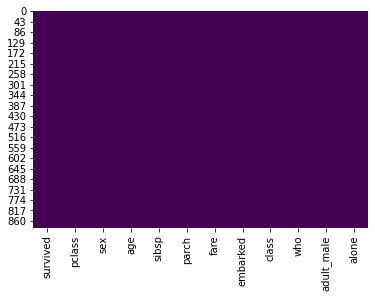

In [42]:
sns.heatmap(titan.isnull(),cbar=False,cmap='viridis')

In [43]:
titan.drop(labels=['class','who'],axis=1, inplace=True)

In [44]:
titan.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64

In [ ]:
##Build Logistic Regression Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
X=titan.drop('survived',axis=1)
Y=titan.survived

In [47]:
X.shape

(891, 9)

In [48]:
X_train,X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.33, random_state=42)

In [49]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
6,1,0,54,0,0,51,0,1,1
718,3,0,25,0,0,15,2,1,1
685,2,0,25,1,2,41,1,1,0
73,3,0,26,1,0,14,1,1,0
882,3,1,22,0,0,10,0,0,1
...,...,...,...,...,...,...,...,...,...
106,3,1,21,0,0,7,0,0,1
270,1,0,38,0,0,31,0,1,1
860,3,0,41,2,0,14,0,1,0
435,1,1,14,1,2,120,0,0,0


solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

‘saga’ also supports ‘elasticnet’ penalty

‘liblinear’ does not support setting penalty='none'

In [50]:
model=LogisticRegression(solver='liblinear',max_iter=100)
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)

In [51]:
model.score(X_test,Y_test)

0.8169491525423729

In [54]:
from sklearn.metrics import classification_report

In [60]:
classification_report(Y_test,Y_predict)

'              precision    recall  f1-score   support\n\n           0       0.83      0.87      0.85       175\n           1       0.80      0.73      0.77       120\n\n    accuracy                           0.82       295\n   macro avg       0.81      0.80      0.81       295\nweighted avg       0.82      0.82      0.82       295\n'

In [ ]:
## 82% is very good accuracy

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(Y_test,Y_predict)

array([[153,  22],
       [ 32,  88]], dtype=int64)

In [ ]:
from sklearn

In [161]:
Y_predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)